<a href="https://colab.research.google.com/github/ouardaoui/ML/blob/master/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## worksapce ready 

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("version:",tf.__version__)
print("version tf_hub",hub.__version__)

version: 2.4.1
version tf_hub 0.11.0


In [ ]:
#check label of our data 
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/dog-breed-identification/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     5779e9d1de839010474af1df2b980806  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


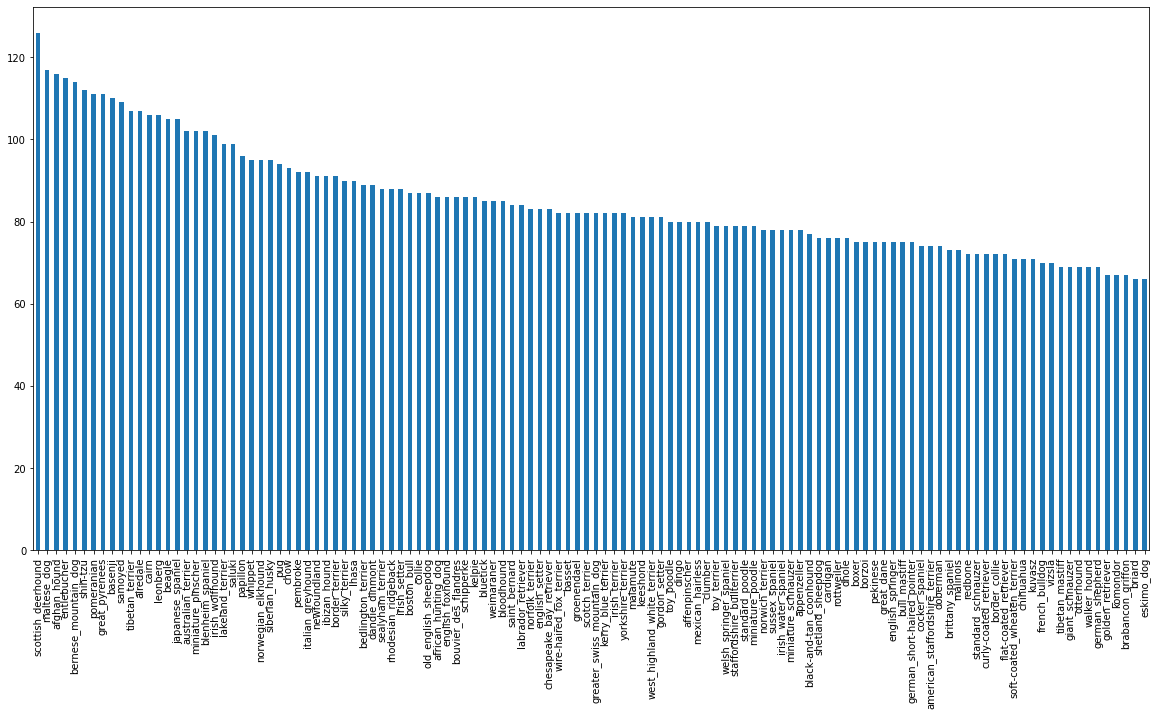

In [ ]:
#how many images are thre of each breed ?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

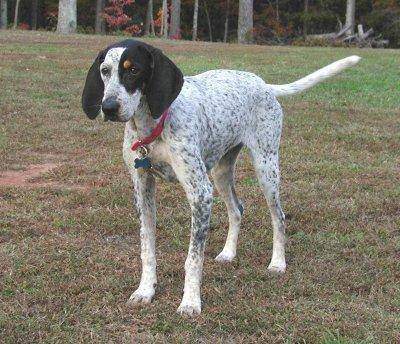

In [24]:
# let's view an image 
from IPython.display import Image
Image("/content/drive/MyDrive/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg")

In [26]:
#create pathnames from image ID's 
filenames = ["/content/drive/MyDrive/dog-breed-identification/train/" + fname + ".jpg" for fname in labels_csv["id"]]
#check the first 10
filenames[:10]

['/content/drive/MyDrive/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [27]:
# check whether number of filenames matches number of actual images files
import os
if len(os.listdir("/content/drive/MyDrive/dog-breed-identification/train/"))== len(filenames):
  print("filenames match actual amount of file !Proced")
else :
  print("filenames do not match actual amount file,check the target directory")

filenames match actual amount of file !Proced
